# Fase 4: Busca de Parâmetros

Nesta fase iremos aprofundar a busca de hiperparamewtros, variabndo os parametros ca cada modelos, e compaerandos seus resultados

O primeiro passo que iremos fazer é importar as bibliotecas principais, e estabelecer o ambiente de execução.


In [1]:
# Bibliotecas Externas
import os
import warnings
import pandas as pd
from sklearn.tree import DecisionTreeClassifier

# Ignorando Warnings
warnings.filterwarnings("ignore")

# Bibliotecas Locais
os.chdir("../..")
from lib import plots, runner, util

# Definido Variáveis globais
N_SPLITS = 5
RANDOM_STATE = 51

## 0. Importando os Dados

Nosso primero é coletar os dados que preparamos na etapa anterior, para verificar como esses dados se comportam

In [2]:
# Conjunto de treino
X_train = pd.read_csv('./data/processed/X_train.csv')
Y_train = pd.read_csv('./data/processed/Y_train.csv')

Y_train['class'] = Y_train['class'].apply(lambda val: 1 if val == 'UP' else 0)

# Conjunto de validação
X_val = pd.read_csv('./data/processed/X_val.csv')
Y_val = pd.read_csv('./data/processed/Y_val.csv')


Y_val['class'] = Y_val['class'].apply(lambda val: 1 if val == 'UP' else 0)

# Conjunto de teste
X_test = pd.read_csv('./data/processed/X_test.csv')
Y_test = pd.read_csv('./data/processed/Y_test.csv')

Y_test['class'] = Y_test['class'].apply(lambda val: 1 if val == 'UP' else 0)

## 1. Algoritmos de Machine Learning para Classificação

### Decision Tree

In [3]:
dt = DecisionTreeClassifier(
    random_state=RANDOM_STATE
)

In [4]:
param_distributions_dt = {
    'max_depth': [1, 2, 5, 10, 50, 100],
    'min_samples_split': [2, 3, 5, 7, 10, 20, 50, 100],
    'min_samples_leaf': [1, 2, 3, 5, 7, 20, 50, 100] 
}

In [12]:
df_dt, model_dt, results_dt, _ , de_cv_result = runner.new_search_params(
    model=dt,
    params=param_distributions_dt,
    X_train=X_train,
    Y_train=Y_train,
    X_val=X_val,
    Y_val=Y_val,
    model_name = 'decision_tree',
    load_existing_model=False,
    save = True
)


RandomizedSearchCV (384 combinações):   0%|          | 0/1 [00:00<?, ?it/s]

Fitting 5 folds for each of 20 candidates, totalling 100 fits


Cross-Validation (5-folds):   0%|          | 0/5 [00:00<?, ?it/s]

In [6]:
df_dt

,K,AUC_test,AUC_train,Accuracy_test,Accuracy_train,F1_Score_test,F1_Score_train,Recall_test,Recall_train,FPR_test,TPR_test
2,3,0.853551,0.961324,0.858607,0.962925,0.829419,0.955458,0.822808,0.951578,"[0.0, 0.11570611526616806, 1.0]","[0.0, 0.8228080931943593, 1.0]"
1,2,0.851198,0.959870,0.855533,0.961965,0.826781,0.954145,0.824755,0.947126,"[0.0, 0.12235915492957747, 1.0]","[0.0, 0.8247549019607843, 1.0]"
0,1,0.850094,0.959623,0.855058,0.961450,0.825416,0.953621,0.819853,0.948506,"[0.0, 0.11966564012318522, 1.0]","[0.0, 0.8198529411764706, 1.0]"
4,5,0.846687,0.960436,0.853740,0.962093,0.821171,0.954448,0.803801,0.950352,"[0.0, 0.11042674879014518, 1.0]","[0.0, 0.8038013488657265, 1.0]"
3,4,0.835836,0.956704,0.842213,0.958955,0.808458,0.950498,0.797057,0.942997,"[0.0, 0.12538495380554335, 1.0]","[0.0, 0.7970570202329859, 1.0]"


In [7]:
de_cv_result

{'mean_fit_time': array([0.16850867, 0.26727314, 0.17813578, 0.20993209, 0.04081883,
        0.04130039, 0.17629328, 0.04512591, 0.17077551, 0.23809032,
        0.26820931, 0.16463737, 0.03435187, 0.17420764, 0.02236524,
        0.19062681, 0.02363763, 0.23414254, 0.08906755, 0.12146053]),
 'std_fit_time': array([0.03257841, 0.02830318, 0.01751174, 0.00353555, 0.01233627,
        0.01058713, 0.02000526, 0.00727071, 0.02062114, 0.03773606,
        0.05020632, 0.04346811, 0.00239303, 0.01452062, 0.00133089,
        0.03158973, 0.00594773, 0.01872079, 0.00570158, 0.00529831]),
 'mean_score_time': array([0.00764198, 0.00716028, 0.00568781, 0.00503893, 0.00386267,
        0.00444994, 0.00391192, 0.00532351, 0.0049397 , 0.00548663,
        0.01073565, 0.00386095, 0.003721  , 0.00473914, 0.00506363,
        0.00453005, 0.00406842, 0.00365157, 0.00435205, 0.00374231]),
 'std_score_time': array([0.00131886, 0.00170912, 0.0012159 , 0.00116433, 0.00154495,
        0.00081442, 0.00147168, 0.000722

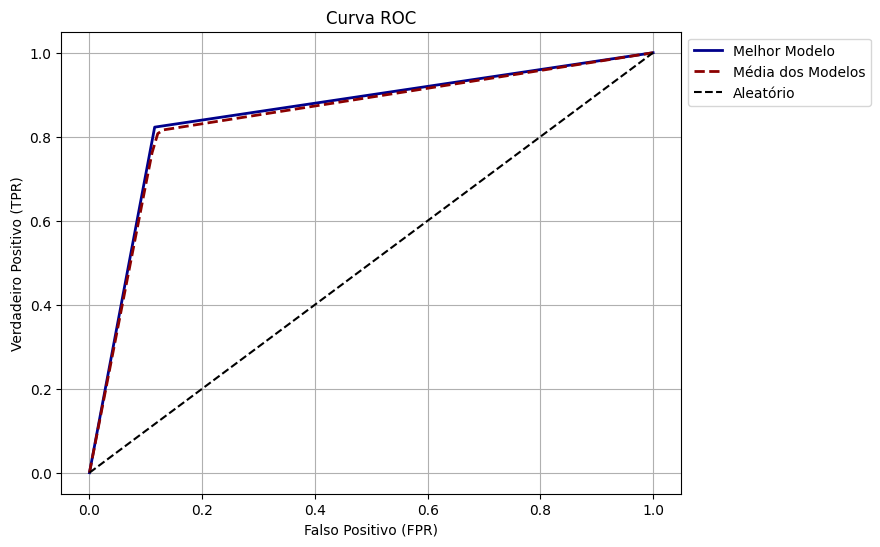

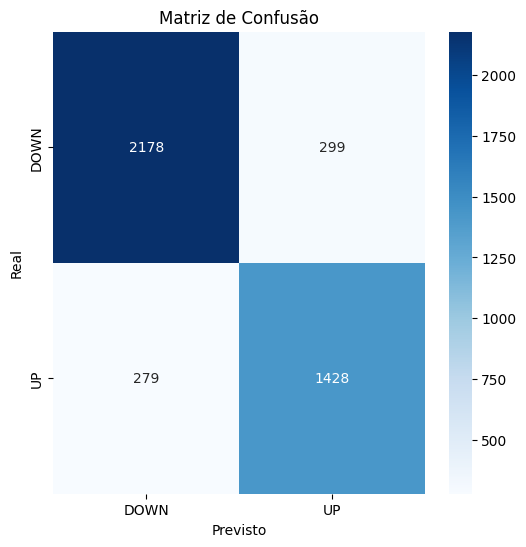

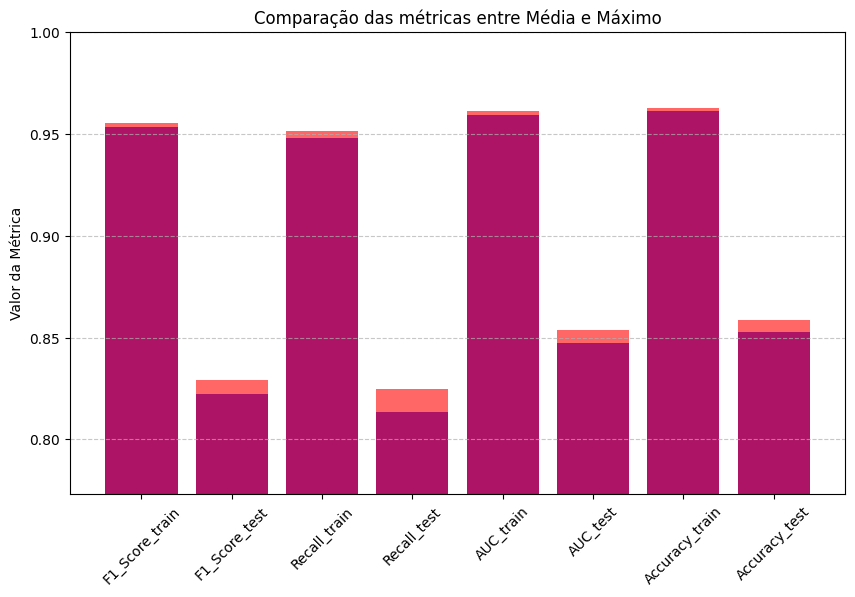

In [8]:
plots.show_roc(df_dt)
plots.show_confusion_matrix(model_dt, X_test, Y_test)
plots.show_bar_metrics(df_dt)

In [9]:
X_test

,date,day,period,nswprice,nswdemand,vicprice,vicdemand,transfer
0,0.451661,3,0.893617,0.038609,0.662154,0.002582,0.542724,0.615351
1,0.893633,7,0.851064,0.069563,0.622285,0.004501,0.463231,0.725439
2,0.456307,4,0.680851,0.034016,0.551622,0.002293,0.547903,0.554825
3,0.451484,6,0.489362,0.043083,0.703660,0.002912,0.645520,0.525877
4,0.473519,3,0.446809,0.027861,0.566052,0.001851,0.545572,0.415789
...,...,...,...,...,...,...,...,...
4179,0.893677,1,0.617021,0.039630,0.333978,0.002553,0.363801,0.656140
4180,0.968895,1,0.468085,0.045244,0.430527,0.002009,0.315381,0.600000
4181,0.451971,3,0.617021,0.033626,0.556531,0.002287,0.579751,0.339474
4182,0.893722,2,0.638298,0.029512,0.512943,0.002000,0.544019,0.372368


In [10]:
X_train.columns

Index(['date', 'day', 'period', 'nswprice', 'nswdemand', 'vicprice',
       'vicdemand', 'transfer'],
      dtype='object')

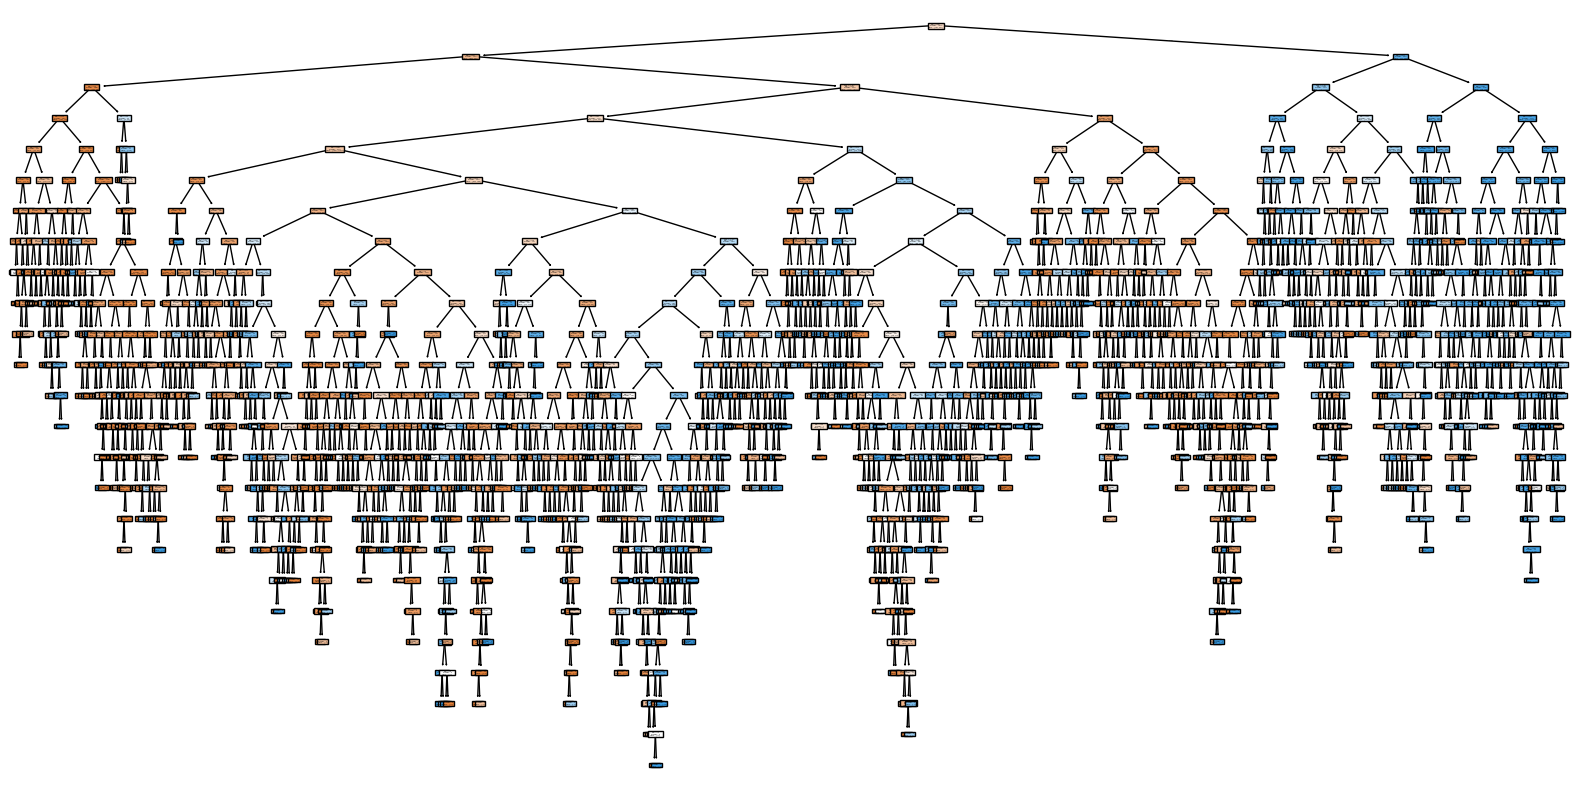

In [11]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

plt.figure(figsize=(20, 10))  # Ajuste o tamanho da figura conforme necessário
plot_tree(model_dt, filled=True, feature_names=X_train.columns) #feature_names é o nome das colunas de atributos
plt.show()